In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load Iris dataset (only 2 features for easy visualization)
iris = load_iris()
X = iris.data[:, :2]  # take only first two features for 2D plotting
y = iris.target

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# --- Base Model: Decision Tree ---
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
base_acc = accuracy_score(y_test, y_pred_base)

In [5]:
# --- Bagging Model ---
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)

print(f"Accuracy before Bagging:  {base_acc:.3f}")
print(f"Accuracy after Bagging:   {bag_acc:.3f}")

Accuracy before Bagging:  0.667
Accuracy after Bagging:   0.711


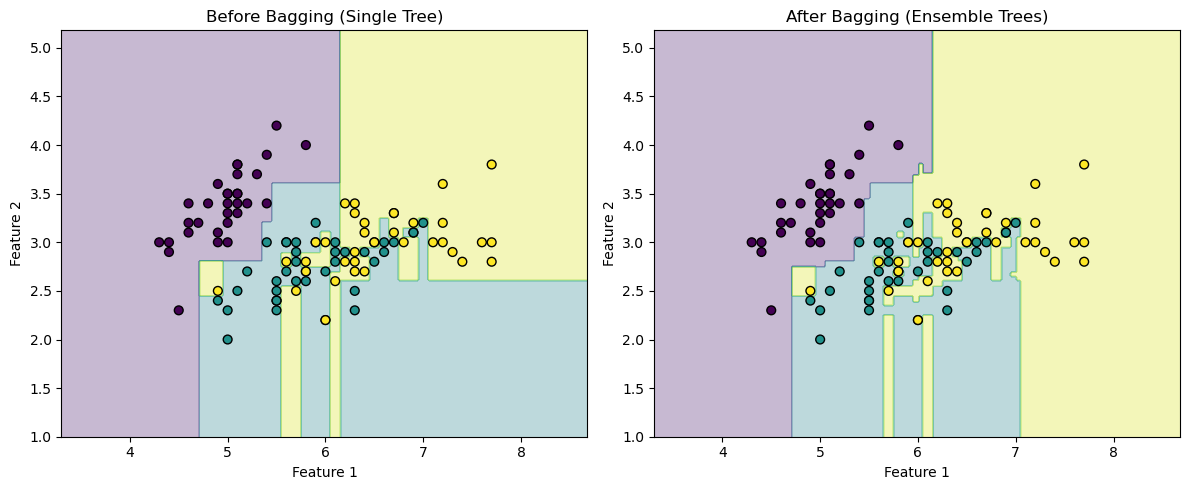

In [6]:
# --- Plot Decision Boundaries ---
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(base_model, X_train, y_train, "Before Bagging (Single Tree)")

plt.subplot(1, 2, 2)
plot_decision_boundary(bag_model, X_train, y_train, "After Bagging (Ensemble Trees)")
plt.tight_layout()
plt.show()